<a href="https://colab.research.google.com/github/pranjalguleria/IRIS_DataAnalysis/blob/main/LicensePlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics opencv-python-headless easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 15.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import easyocr
import string

In [ ]:
cv2.__version__

'4.8.0'

In [ ]:
##coco model is used to detect the vehicles in the photo
coco_model = YOLO('yolov8n.pt')

##this is self trained model to detect license plates
license_plate_detector = YOLO('license_plate_detector.pt')

In [ ]:
vehicles = [2, 3, 5, 7]

In [ ]:
#for detecting the vehicles
detections = coco_model(image)[0]
detections_ = []

# Iterate through detections and filter out vehicle detections
for detection in detections.boxes.data.tolist():
    # Extract bounding box coordinates, score, and class ID
    x1, y1, x2, y2, score, class_id = detection
    if int(class_id) in vehicles:
        detections_.append([x1, y1, x2, y2, score])

# Draw rectangles around detected vehicles
for x1, y1, x2, y2, score in detections_:
    # Draw rectangle
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

# Display the image with rectangles
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'image' is not defined

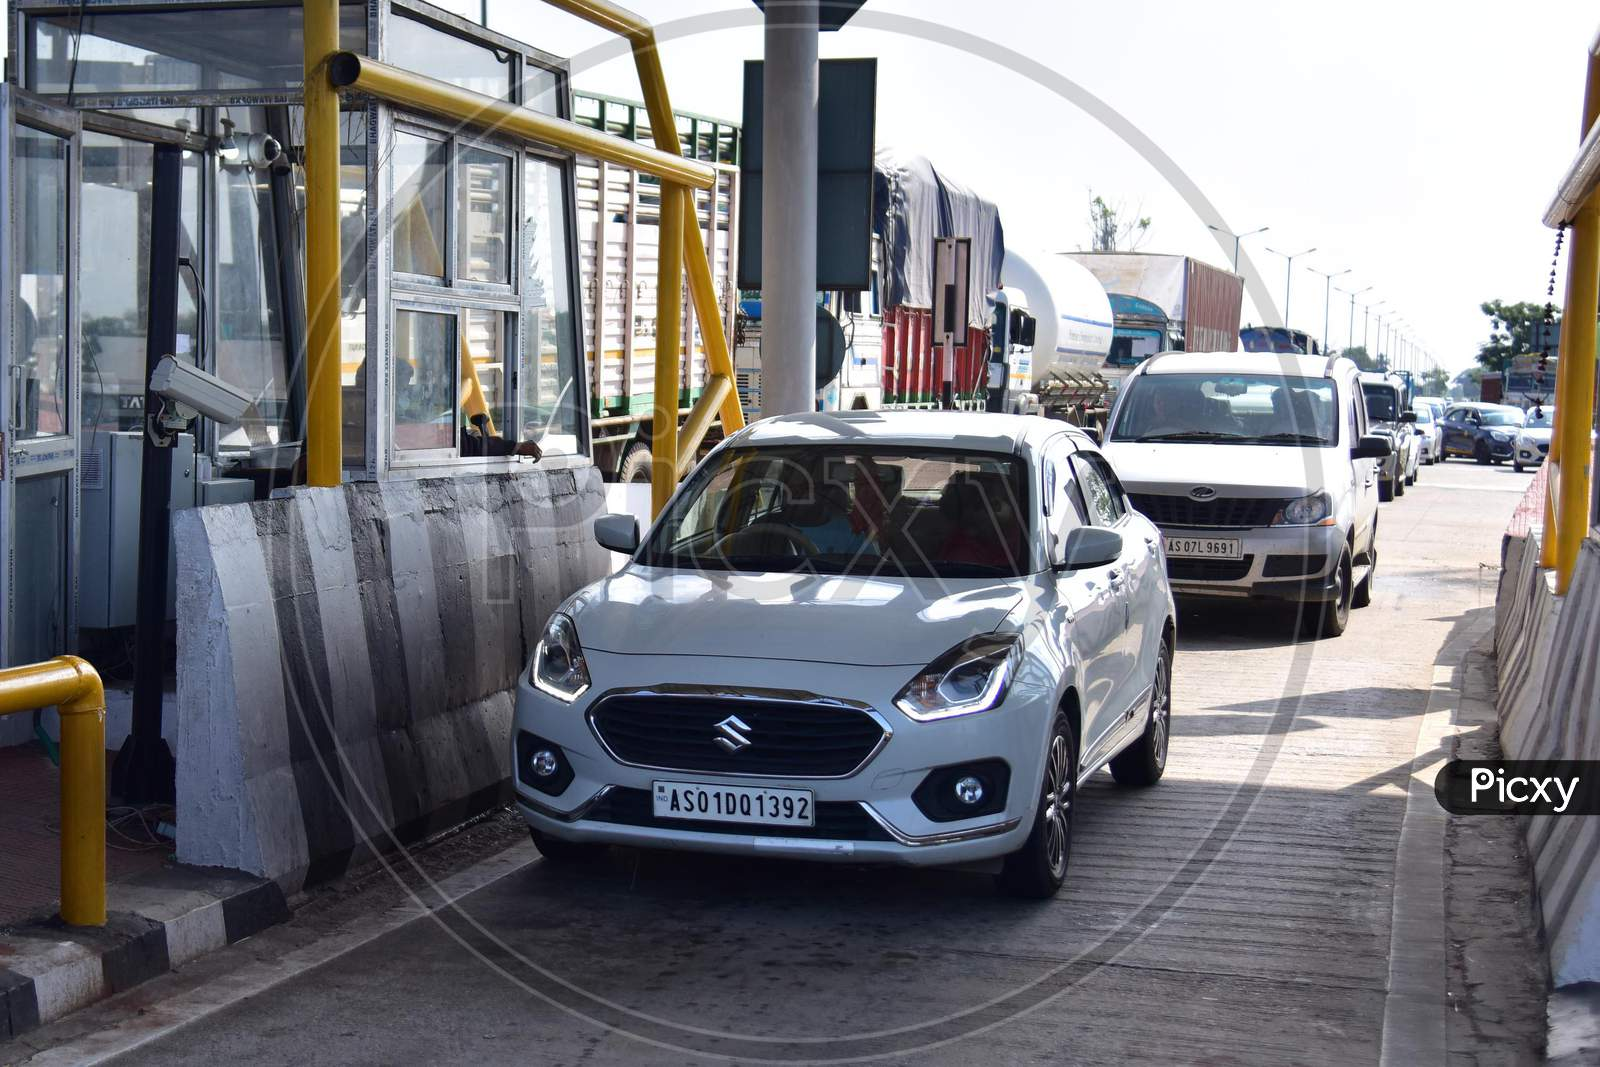

In [ ]:
##reading the image
image = cv2.imread('d7.jpg')
cv2_imshow(image)

In [ ]:
##utility functions

# Initialize the OCR reader
reader = easyocr.Reader(['en'], gpu=False)

# Mapping dictionaries for character conversion
dict_char_to_int = {'O': '0',
                    'I': '1',
                    'J': '3',
                    'A': '4',
                    'G': '6',
                    'S': '5',
                    '_': '7'}

dict_int_to_char = {'0': 'O',
                    '1': 'I',
                    '3': 'J',
                    '4': 'A',
                    '6': 'G',
                    '5': 'S'}

def license_complies_format(text):
    """
    Check if the license plate text complies with the required format.

    Args:
        text (str): License plate text.

    Returns:
        bool: True if the license plate complies with the format, False otherwise.
    """
    if len(text) != 10:
        return False

    if (text[0] in string.ascii_uppercase or text[0] in dict_int_to_char.keys()) and \
       (text[1] in string.ascii_uppercase or text[1] in dict_int_to_char.keys()) and \
       (text[2] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[2] in dict_char_to_int.keys()) and \
       (text[3] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[3] in dict_char_to_int.keys()) and \
       (text[4] in string.ascii_uppercase or text[4] in dict_int_to_char.keys()) and \
       (text[5] in string.ascii_uppercase or text[5] in dict_int_to_char.keys()) and \
       (text[6] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[6] in dict_char_to_int.keys()) and \
       (text[7] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[7] in dict_char_to_int.keys()) and \
       (text[8] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[8] in dict_char_to_int.keys()) and \
       (text[9] in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] or text[9] in dict_char_to_int.keys()):
        return True
    else:
        return False


def format_license(text):
    """
    Format the license plate text by converting characters using the mapping dictionaries.

    Args:
        text (str): License plate text.

    Returns:
        str: Formatted license plate text.
    """
    license_plate_ = ''
    mapping = {0: dict_int_to_char, 1: dict_int_to_char, 4: dict_int_to_char, 5: dict_int_to_char,
               2: dict_char_to_int, 3: dict_char_to_int, 6: dict_char_to_int, 7: dict_char_to_int, 8: dict_char_to_int, 9: dict_char_to_int}
    for j in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        if text[j] in mapping[j].keys():
            license_plate_ += mapping[j][text[j]]
        else:
            license_plate_ += text[j]

    return license_plate_
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                            cv2.THRESH_BINARY, 11, 2)
    return adaptive_thresh


def read_license_plate(license_plate_crop):
    """
    Read the license plate text from the given cropped image.

    Args:
        license_plate_crop (PIL.Image.Image): Cropped image containing the license plate.

    Returns:
        tuple: Tuple containing the formatted license plate text and its confidence score.
    """

    detections = reader.readtext(license_plate_crop)

    for detection in detections:
        bbox, text, score = detection


        text1 = text.upper().replace(' ', '')



        if license_complies_format(text1):
            return format_license(text1), score
        else:
           return None, text1

In [ ]:
def readNumberPlate(img):
  license_plates = license_plate_detector(img)[0]
  for license_plate in license_plates.boxes.data.tolist():
   x1, y1, x2, y2, score, class_id = license_plate
   cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)
   cv2_imshow(img)
   print("after preprocessing")

            #crop the license plate
   license_plate_crop = img[int(y1):int(y2),int(x1):int(x2),: ]

            #process license plate for easy ocr to read
   license_plate_crop_gray = cv2.cvtColor(license_plate_crop, cv2.COLOR_BGR2GRAY)
   _, license_plate_crop_thresh = cv2.threshold(license_plate_crop_gray,64,255,cv2.THRESH_BINARY_INV)
   resized = cv2.resize(license_plate_crop_thresh, (900, 200))

   cv2_imshow(resized)
   ##calling the utility functions
   license_plate_text, score = read_license_plate(resized)
   print("license plate number => ",license_plate_text," score: ",score)



0: 448x640 1 license_plate, 150.2ms
Speed: 4.6ms preprocess, 150.2ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


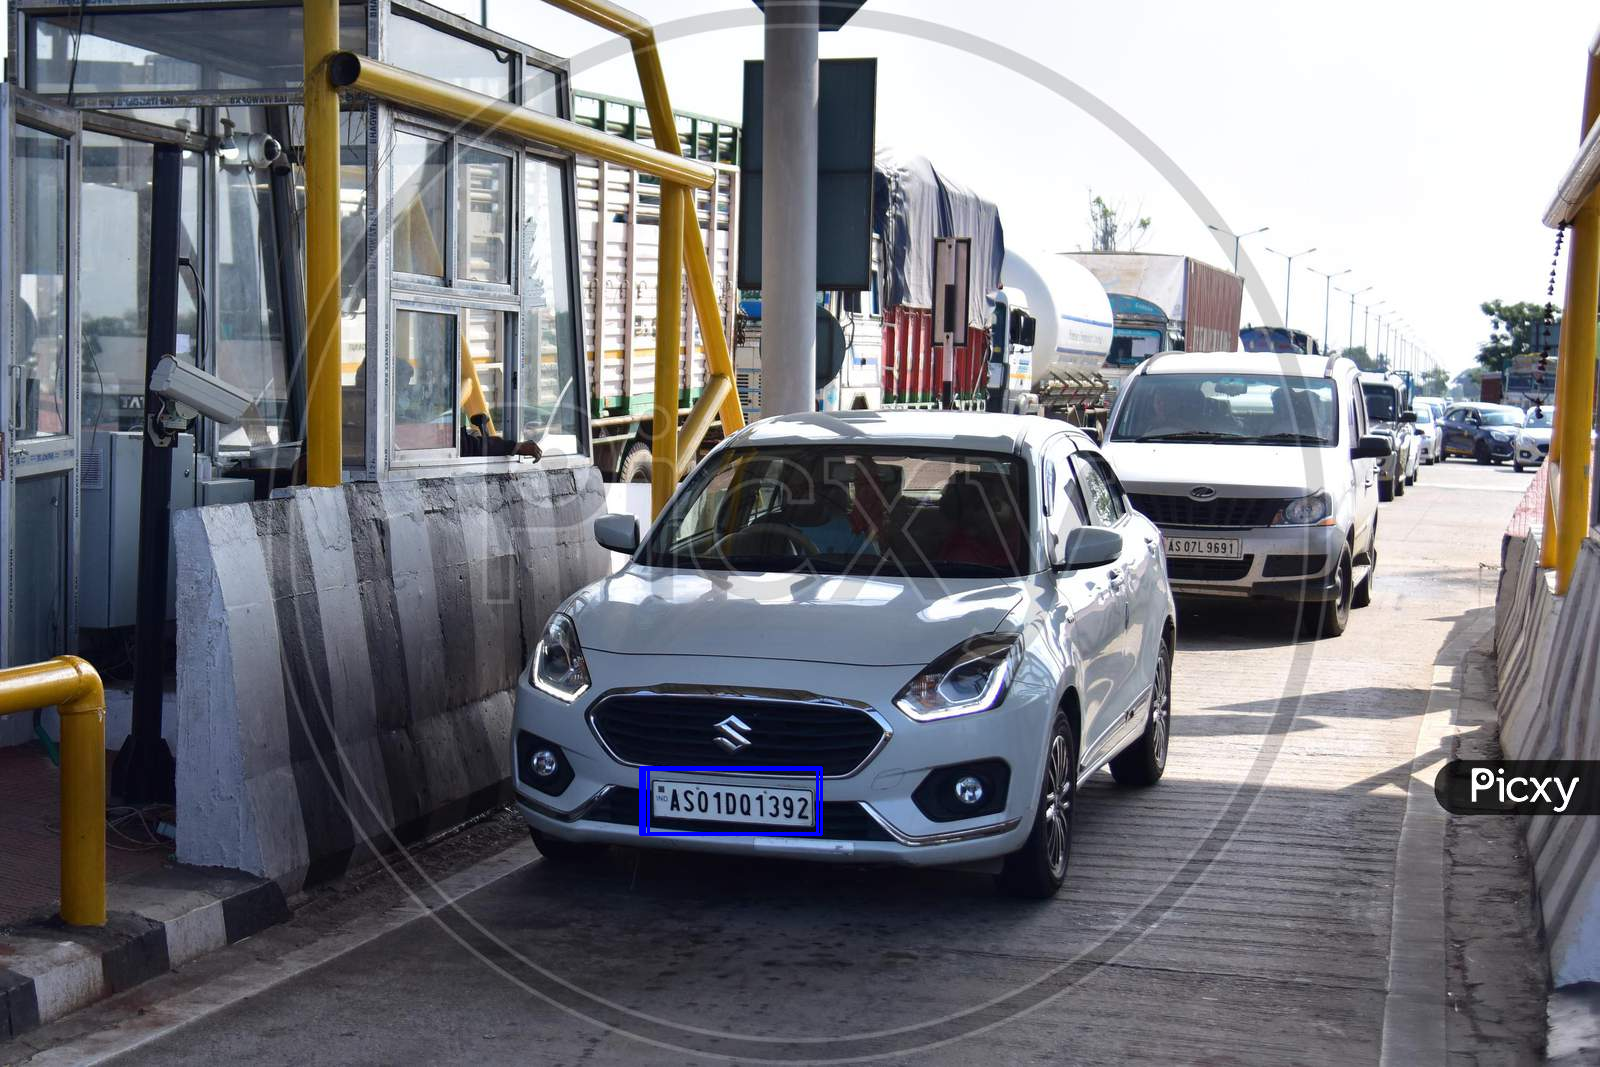

after preprocessing


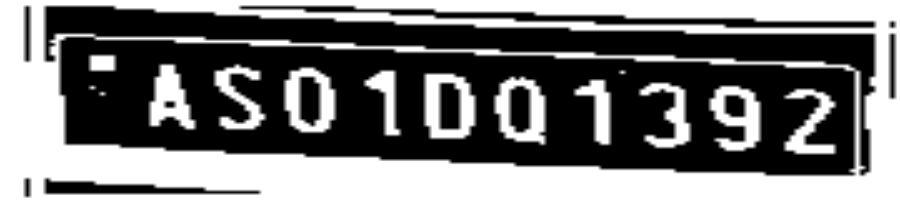

license plate number =>  AS01OO1392  score:  0.17573770442973688


In [ ]:
readNumberPlate(image)